In [71]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score,f1_score

import warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_excel('/content/drive/MyDrive/projects data sets ml/customer_churn_large_dataset.xlsx')


In [11]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [12]:
df.shape

(100000, 9)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [14]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [21]:
df['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

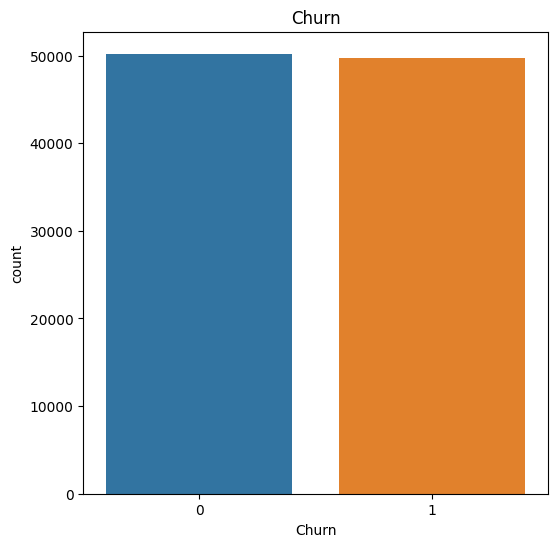

In [22]:
plt.figure(figsize=(6,6))
sns.countplot(x='Churn',data=df)
plt.title('Churn')
plt.show()

In [23]:
df['Gender'].value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

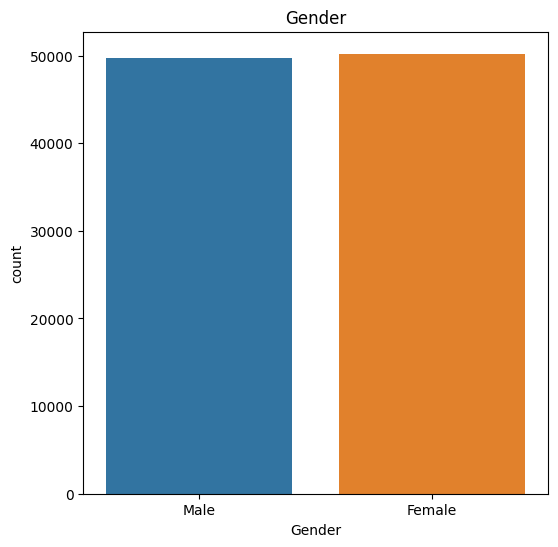

In [24]:
plt.figure(figsize=(6,6))
sns.countplot(x='Gender',data=df)
plt.title('Gender')
plt.show()

In [26]:
df['Location'].unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

In [28]:
df['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

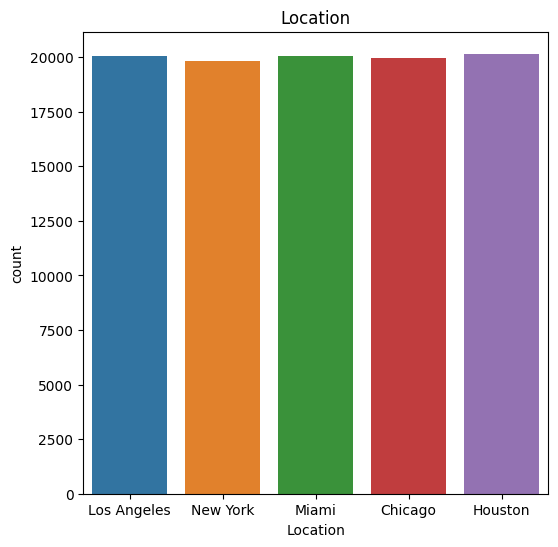

In [29]:
plt.figure(figsize=(6,6))
sns.countplot(x='Location',data=df)
plt.title('Location')
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

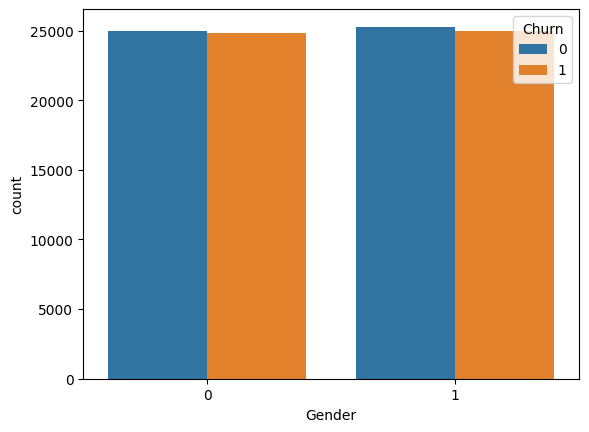

In [52]:
sns.countplot(x='Gender',hue='Churn',data=df)

<Axes: xlabel='Location', ylabel='count'>

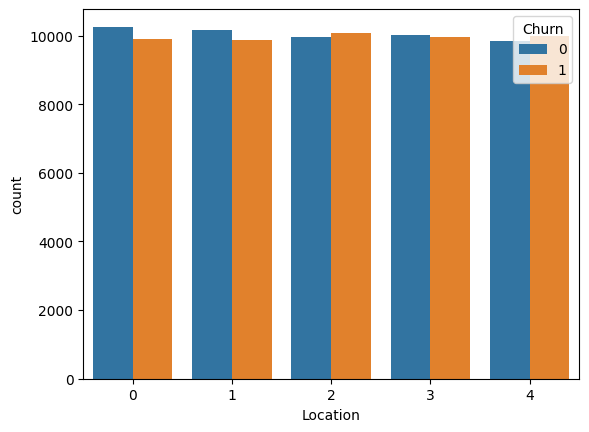

In [53]:
sns.countplot(x='Location',hue='Churn',data=df)

In [30]:
df['Subscription_Length_Months'].value_counts()

20    4303
22    4267
1     4247
16    4229
2     4228
14    4213
7     4211
11    4200
6     4184
5     4171
18    4171
12    4155
21    4154
13    4154
10    4151
3     4136
9     4134
15    4122
24    4113
8     4106
19    4106
4     4098
23    4083
17    4064
Name: Subscription_Length_Months, dtype: int64

In [32]:
df['Subscription_Length_Months'].unique()

array([17,  1,  5,  3, 19, 15, 10, 12, 20, 13,  8, 23,  2,  4, 18,  9, 14,
       16,  6,  7, 24, 22, 11, 21])

In [33]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [45]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)
df.replace({'Location':{'Houston':0,'Los Angeles':1,'Miami':2,'Chicago':3,'New York':4}},inplace=True)

In [46]:
df.head()

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,63,0,1,17,73.36,236,0
1,2,62,1,4,1,48.76,172,0
2,3,24,1,1,5,85.47,460,0
3,4,36,1,2,3,97.94,297,1
4,5,46,1,2,19,58.14,266,0


In [54]:
X=df.drop(columns='Churn',axis=1)
y=df['Churn']

In [55]:
print(X)

       CustomerID  Age  Gender  Location  Subscription_Length_Months  \
0               1   63       0         1                          17   
1               2   62       1         4                           1   
2               3   24       1         1                           5   
3               4   36       1         2                           3   
4               5   46       1         2                          19   
...           ...  ...     ...       ...                         ...   
99995       99996   33       0         0                          23   
99996       99997   62       1         4                          19   
99997       99998   64       0         3                          17   
99998       99999   51       1         4                          20   
99999      100000   27       1         1                          19   

       Monthly_Bill  Total_Usage_GB  
0             73.36             236  
1             48.76             172  
2             85.47  

In [56]:
print(y)

0        0
1        0
2        0
3        1
4        0
        ..
99995    1
99996    0
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64


In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [58]:
print(X.shape,X_train.shape,X_test.shape)

(100000, 7) (80000, 7) (20000, 7)


**LogisticRegression**

In [59]:
log_model = LogisticRegression()

In [60]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [61]:
y_pred = log_model.predict(X_test)
y_pred[:5]

array([0, 0, 0, 0, 0])

In [62]:
confusion_matrix(y_test,y_pred)

array([[10053,     0],
       [ 9947,     0]])

In [87]:
accuracy_score(y_test,y_pred)

0.50265

In [88]:
precision_score(y_test,y_pred)

0.0

In [89]:
recall_score(y_test,y_pred)

0.0

In [90]:
f1_score(y_test,y_pred)

0.0

**DECISION TREE CLASSIFIER**


In [73]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [74]:
y_pred2=dt.predict(X_test)

In [75]:
accuracy_score(y_test,y_pred2)

0.49565

In [76]:
precision_score(y_test,y_pred2)

0.4929264349232013

In [77]:
recall_score(y_test,y_pred2)

0.4903991153111491

In [78]:
f1_score(y_test,y_pred2)

0.4916595272892204

**RANDOM FOREST CLASSIFIER**


In [79]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [80]:
y_pred3=rf.predict(X_test)

In [81]:
accuracy_score(y_test,y_pred3)

0.4944

In [82]:
precision_score(y_test,y_pred3)

0.4911376087657106

In [83]:
recall_score(y_test,y_pred3)

0.45963607117723937

In [84]:
f1_score(y_test,y_pred3)

0.4748649771499792

In [85]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],'ACCURACY':[accuracy_score(y_test,y_pred)*100,
                                                                 accuracy_score(y_test,y_pred2)*100,
                                                                 accuracy_score(y_test,y_pred3)*100]})

In [86]:
final_data

,Models,ACCURACY
0,LR,50.265
1,DT,49.565
2,RF,49.440


<Axes: xlabel='Models', ylabel='ACCURACY'>

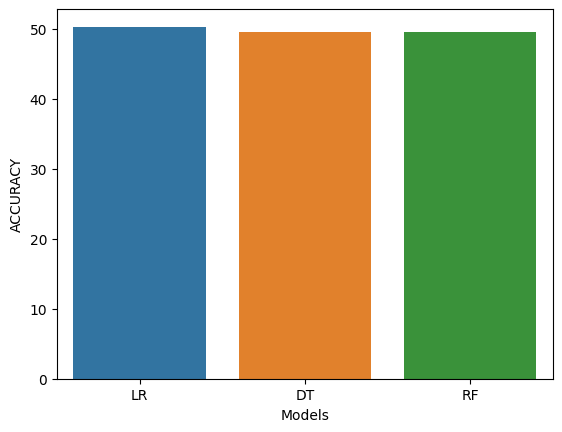

In [91]:
sns.barplot(x='Models',y='ACCURACY',data=final_data)

In [93]:
input_data = (	4,	36,	1,	2,	3,	97.94,	297	)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf.predict(input_data_reshaped)
print(prediction)

[1]
